In [1]:
import numpy as np
import pandas as pd

import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(path)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# O dataset nao contem valores nulos

In [5]:
total = len(df)

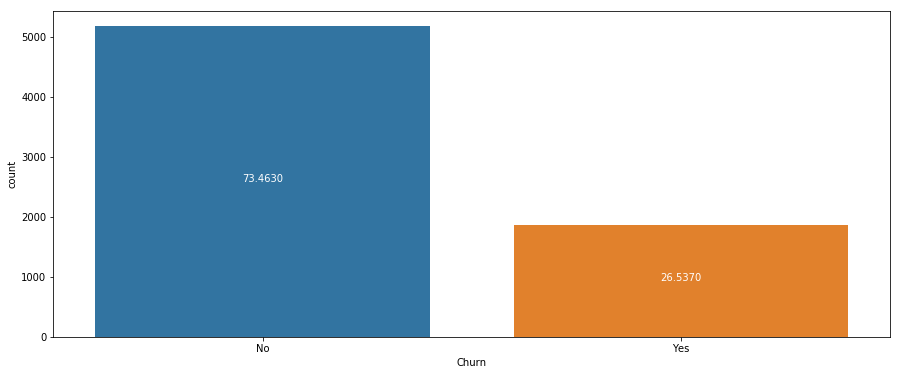

In [6]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.countplot(data=df, x='Churn')
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white') 
# plt.show()
plt.savefig('Churn_distribution.png')

In [7]:
text_label = LabelEncoder()
df['Churn'] = text_label.fit_transform(df.Churn)

In [8]:
df.MultipleLines = df.MultipleLines.apply(lambda x: x.split()[0])
df.OnlineBackup = df.OnlineBackup.apply(lambda x: x.split()[0])
df.OnlineSecurity = df.OnlineSecurity.apply(lambda x: x.split()[0])
df.DeviceProtection = df.DeviceProtection.apply(lambda x: x.split()[0])
df.TechSupport = df.TechSupport.apply(lambda x: x.split()[0])
df.StreamingMovies = df.StreamingMovies.apply(lambda x: x.split()[0])
df.StreamingTV = df.StreamingTV.apply(lambda x: x.split()[0])

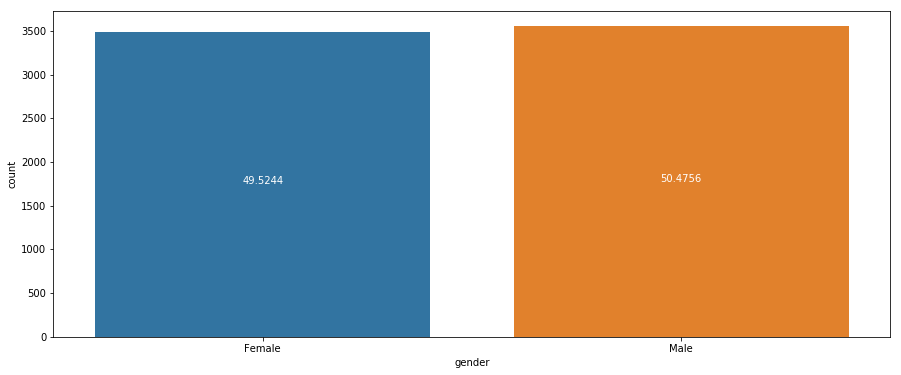

In [9]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.countplot(df.gender, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('gende_distribution.png')

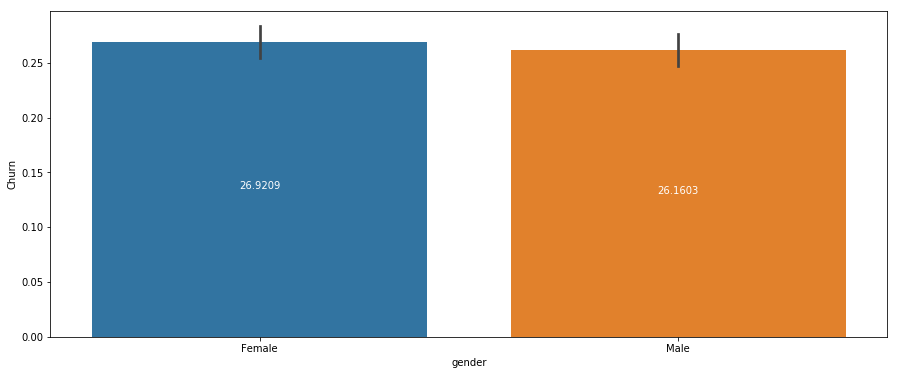

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
g = sns.barplot(df.gender, df.Churn, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('gender_churn.png')

# A quantidade de cliente de cada genero eh parecida, e a taxa de Churn tambem

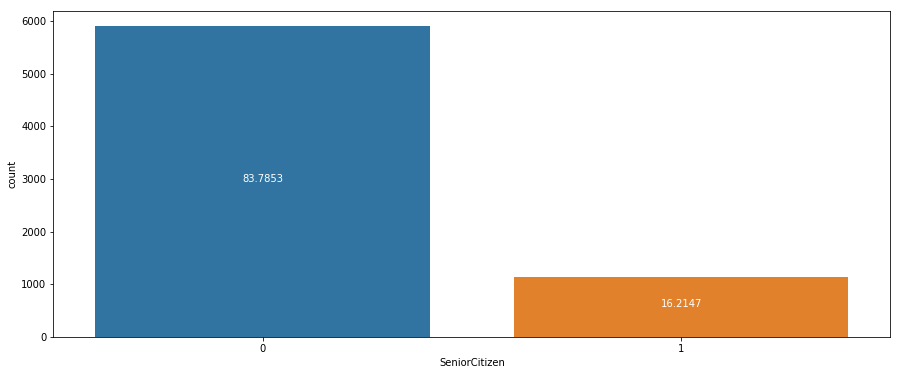

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(x='SeniorCitizen', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('senior_citizen_dist.png')

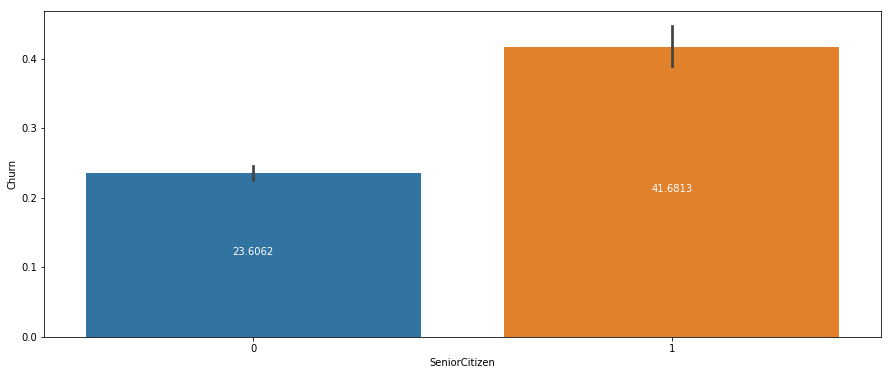

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', x='SeniorCitizen', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('senio_citizen_churn.png')

# A quantidade de cidadaos idosos e bem inferior aos demais, porem eles possuem maior taxa de Churn

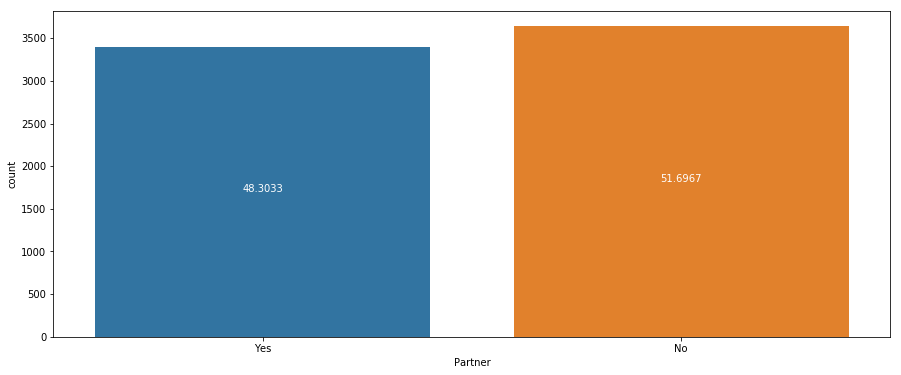

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(x='Partner', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('partner_dist.png')

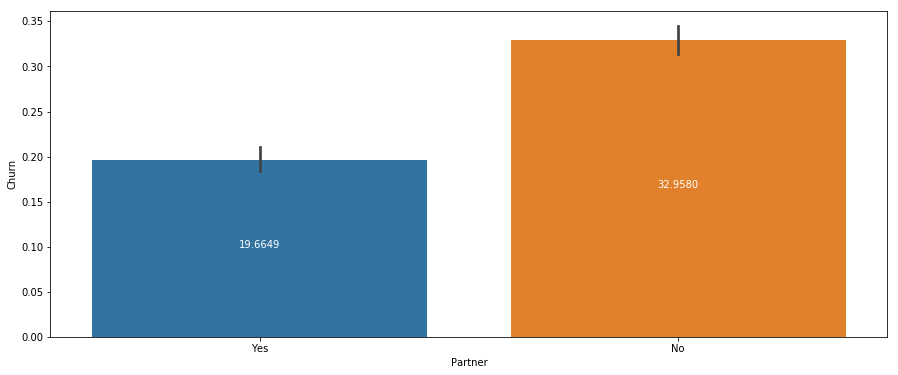

In [14]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', x='Partner', data=df, ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('partner_churn.png')

# A quantidade de clientes com companheira/o eh um pouco menor que os clientes sem companheiras/os, e taxa de Churn de clientes sem companheira/o eh maior

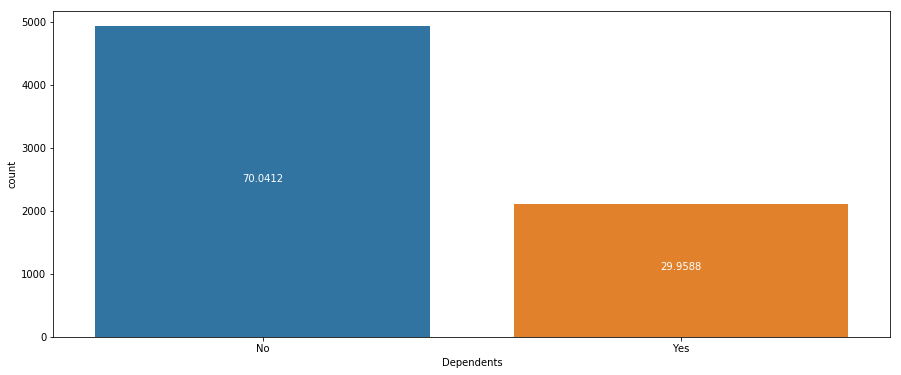

In [15]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='Dependents', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('dependents_dist.png')

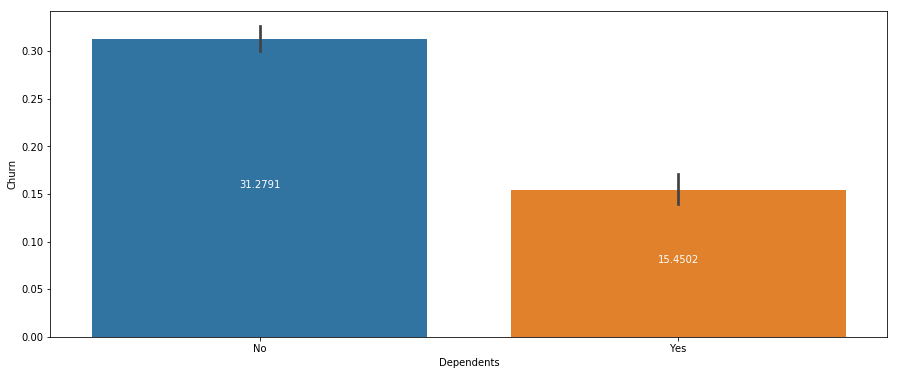

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='Dependents', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(height*100),
            ha="center", color='white')
# plt.show()
plt.savefig('dependents_churn.png')

# A quantidade de clientes com dependentes eh bem menor que os clientes sem dependentes

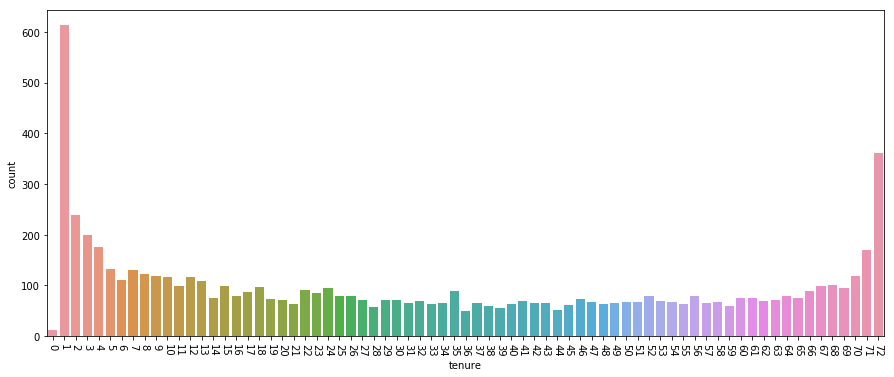

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(df.tenure, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=-90)
# plt.show()
plt.savefig('tenure_dist.png')

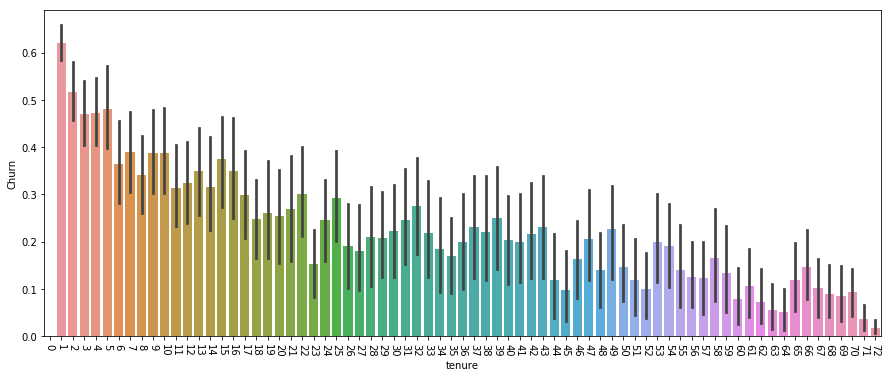

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(df.tenure, df.Churn, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=-90)
# plt.show()
plt.savefig('tenure_churn.png')

# A probabilidade de Churn eh maior em usuarios que sao clientes a pouco tempo

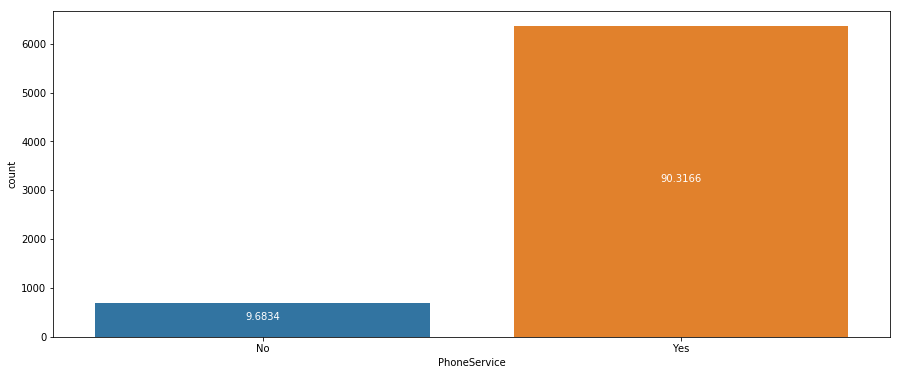

In [19]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='PhoneService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('phone_Service_dist.png')

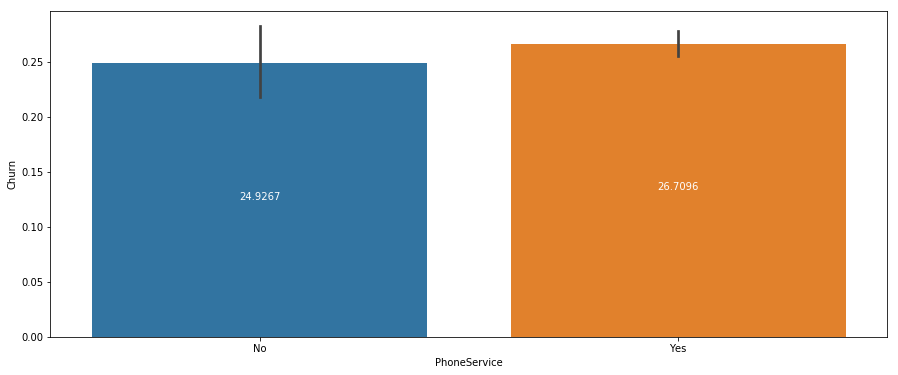

In [20]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='PhoneService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('phone_service_churn.png')

# Maioria dos cliente possuem servico de telefone, e porcentagem de churn eh igual para ambos


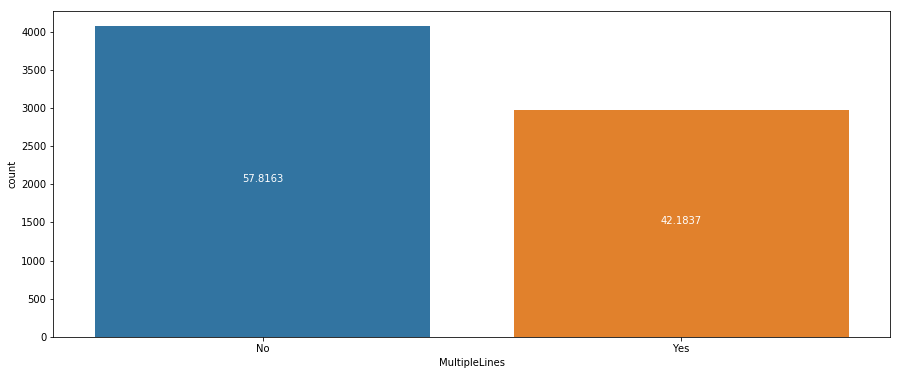

In [21]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='MultipleLines', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('multiple_lines_dist.png')

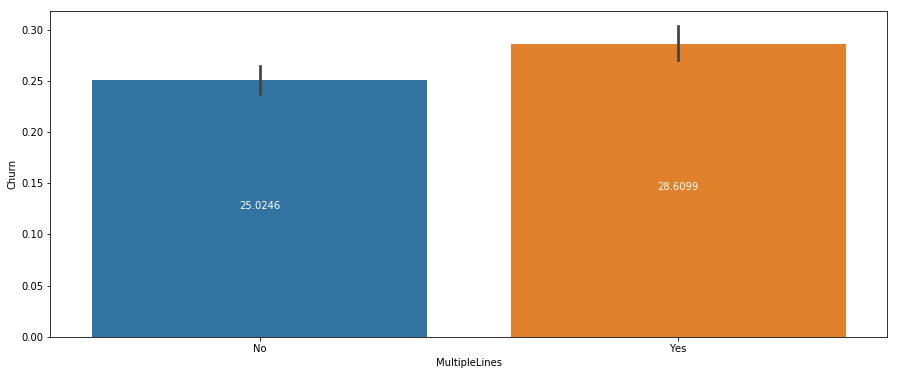

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='MultipleLines', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('multiple_lines_churn.png')

# 'No phone service' pode virar 'No'

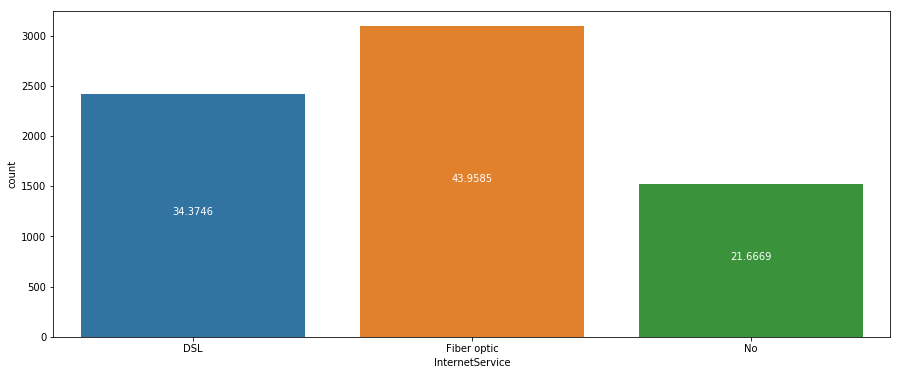

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='InternetService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('internet_service_dist.png')

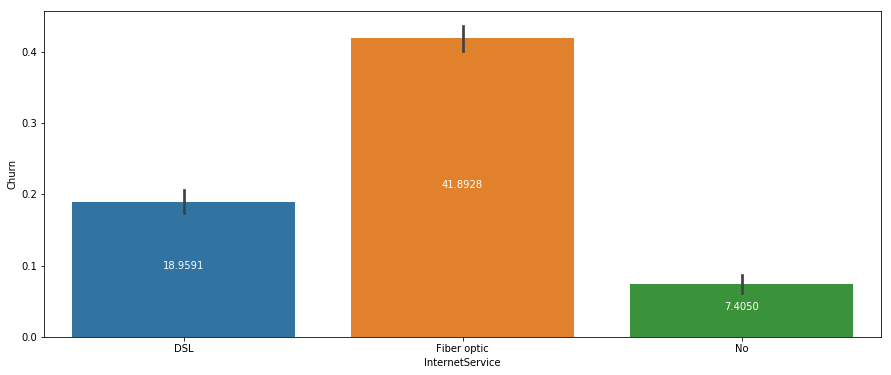

In [24]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='InternetService', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('internet_service_churn.png')

# Clientes com servico de Fibra otica tem maior porcentagem de churn

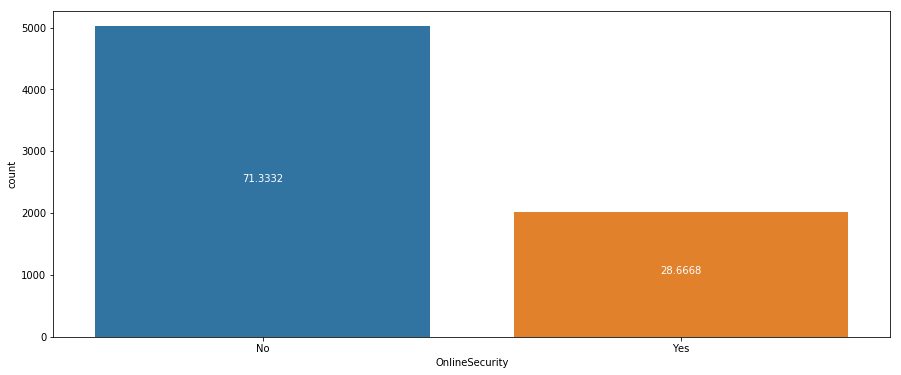

In [25]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='OnlineSecurity', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('online_security_dist.png')

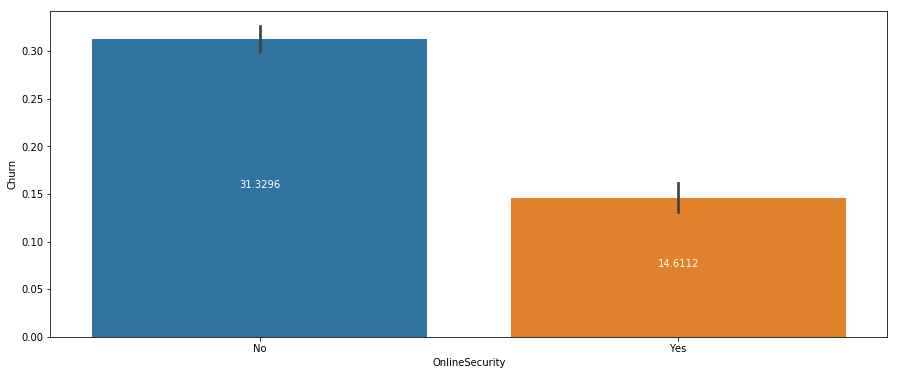

In [26]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='OnlineSecurity', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('online_security_churn.png')

# 'No internet service' pode virar 'No'. Clientes sem servico de Seguranca Online tem maior porbabilidade de Churn

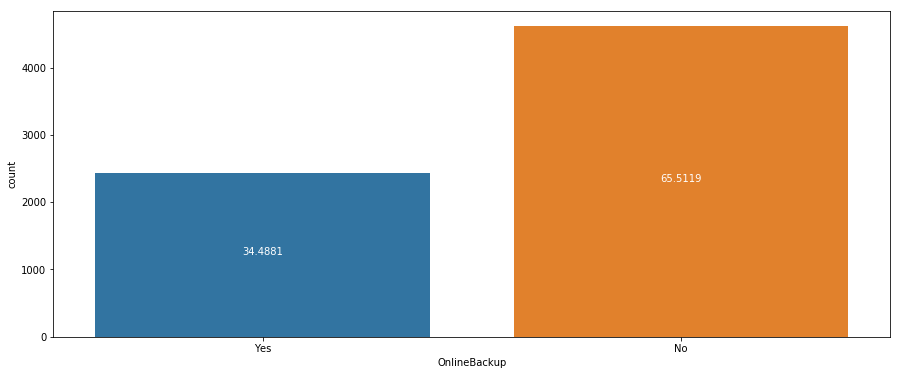

In [27]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='OnlineBackup', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('online_backup_dist.png')

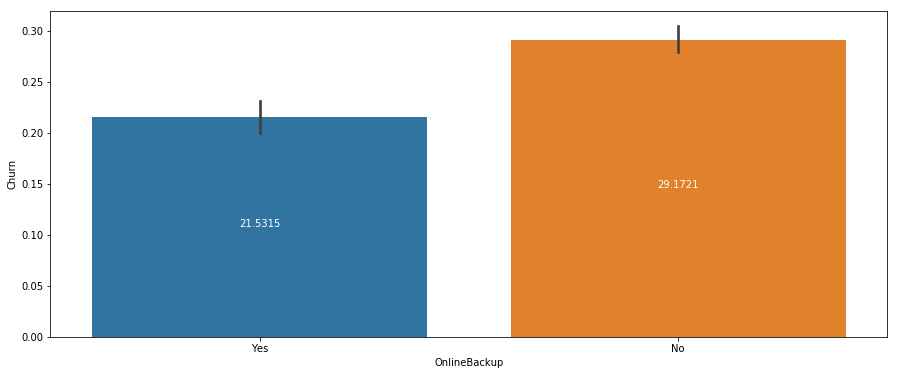

In [28]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='OnlineBackup', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('online_backup_churn.png')

# 'No internet service' pode virar 'No'. Clientes que possuem servico de Backup Online tem maior probabilidade de Churn

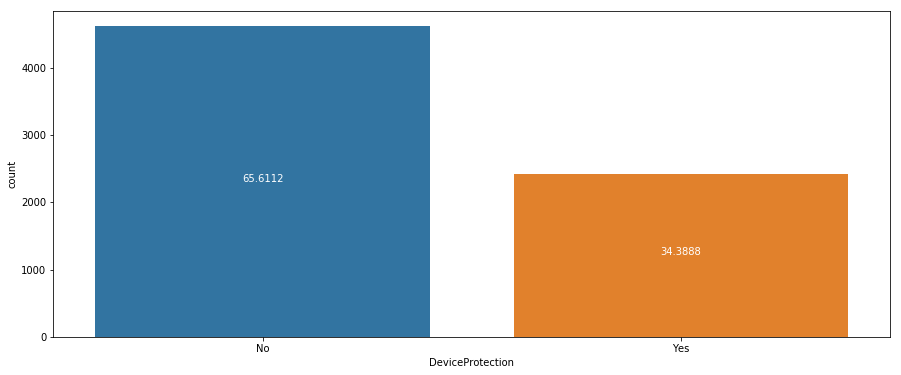

In [29]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='DeviceProtection', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('device_protection_dist.png')

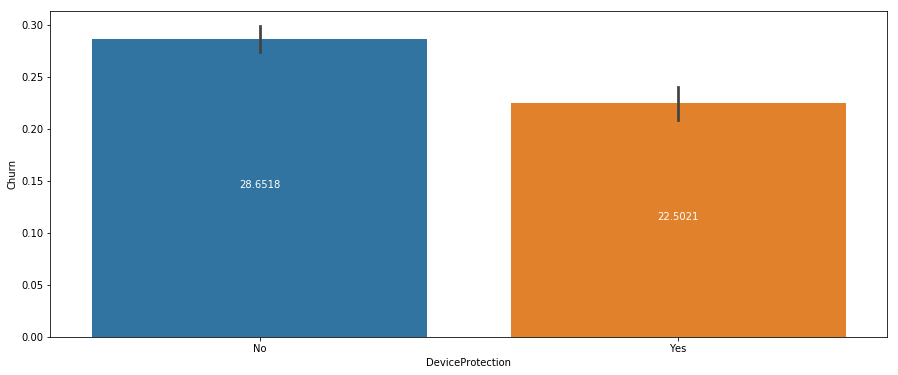

In [30]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='DeviceProtection', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('device_protection_churn.png')

# 'No internet service' pode virar 'No'. Clientes que nao possuem servico de Protecao de Dispositivo tem maior probabilidade de Churn

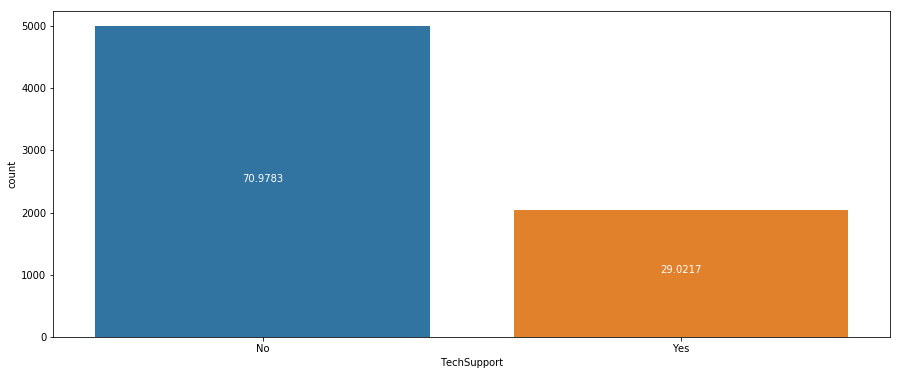

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='TechSupport', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('tech_support_dist.png')

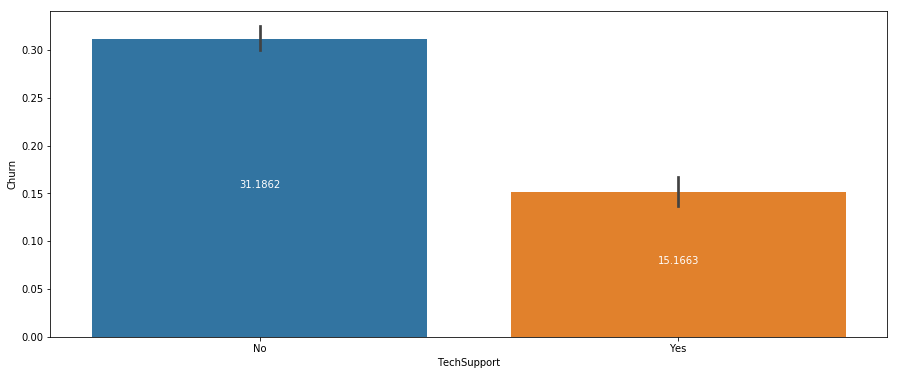

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='TechSupport', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('tech_support_churn.png')

# 'No internet service' pode virar 'No'

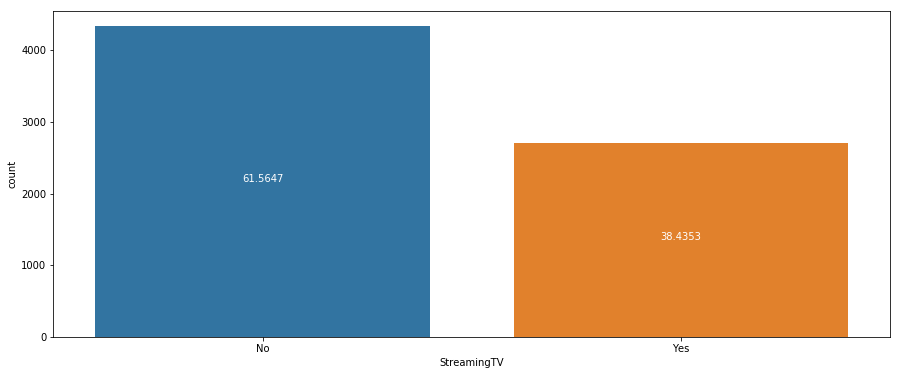

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='StreamingTV', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_tv_dist.png')

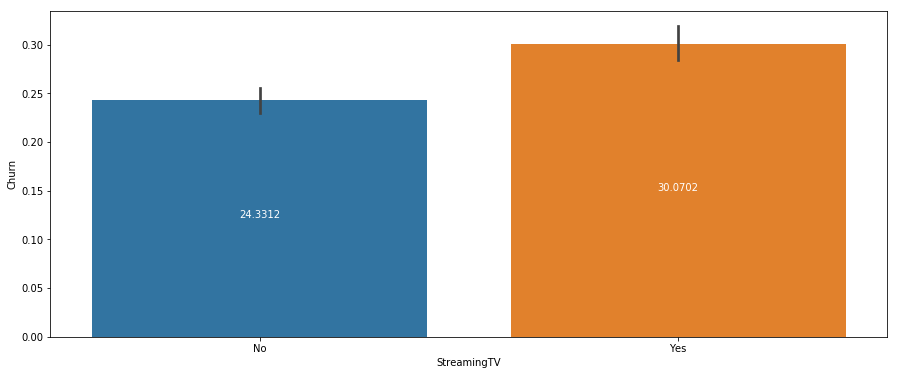

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='StreamingTV', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_tv_churn.png')

# 'No internet service' pode virar 'No'. A quantidade de cliente que possuem Streaming de TV eh menor, porem ha uma maior probabilidade de Churn desses que possuem

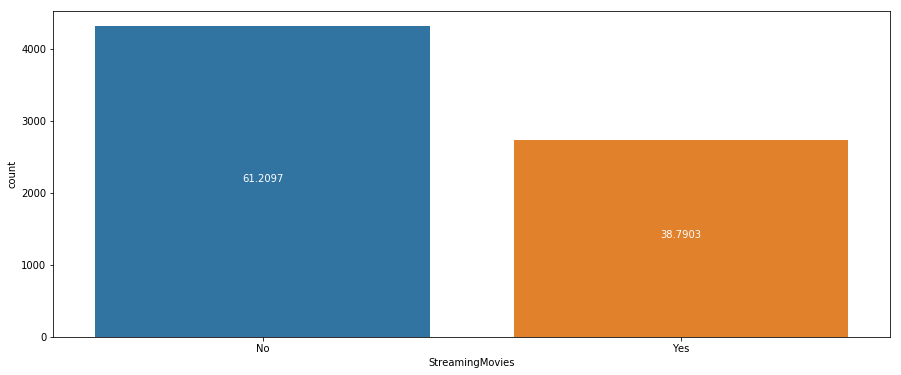

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='StreamingMovies', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_movies_dist.png')

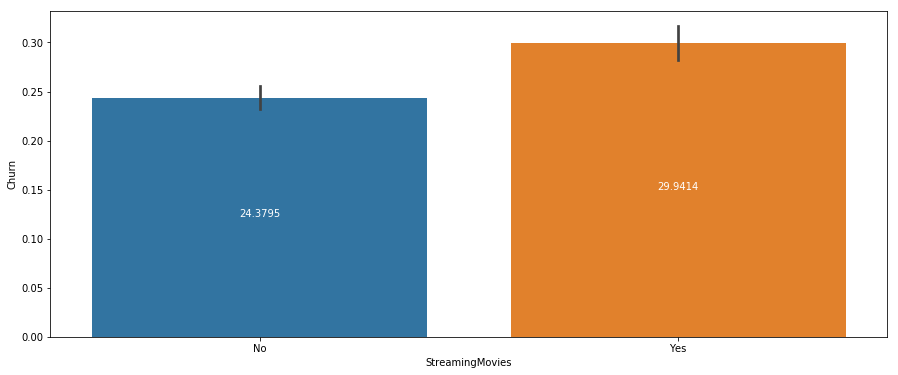

In [36]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='StreamingMovies', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('streaming_movies_churn.png')

# 'No internet service' pode virar 'No'. A quantidade de cliente que possuem Streaming de Filme eh menor, porem ha uma maior probabilidade de Churn desses que possuem

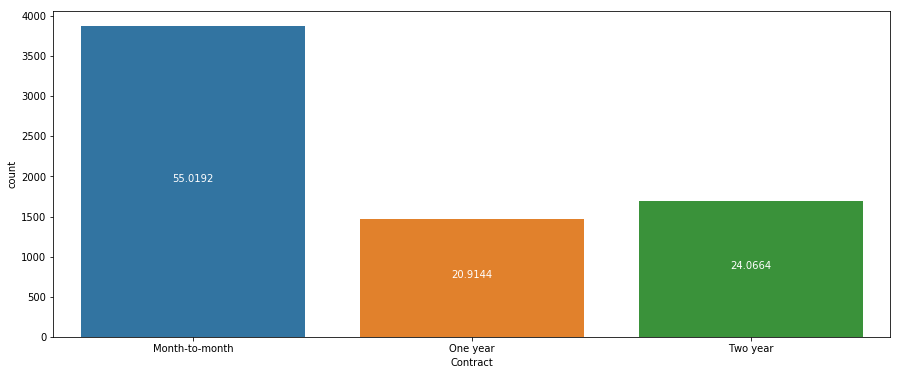

In [37]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='Contract', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('contract_dist.png')

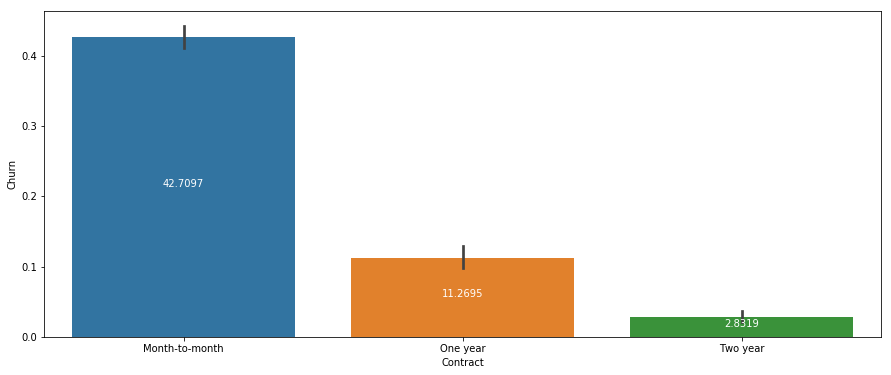

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='Contract', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('contract_churn.png')

# Clientes com contrato mensal tem maior probabilidade de Churn

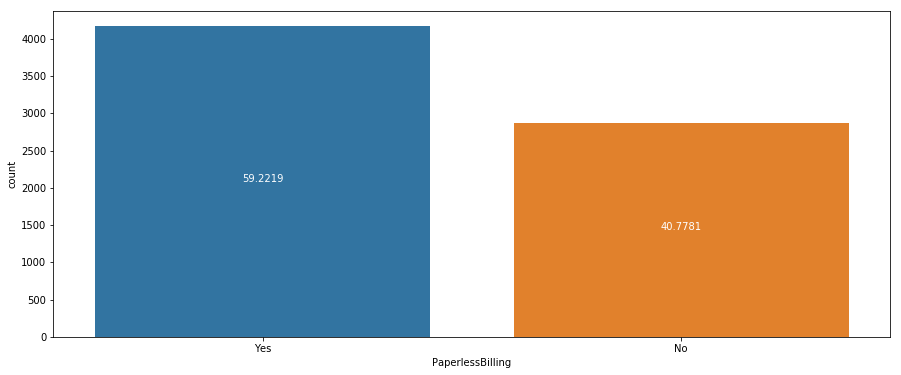

In [39]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='PaperlessBilling', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('paperless_billing_dist.png')

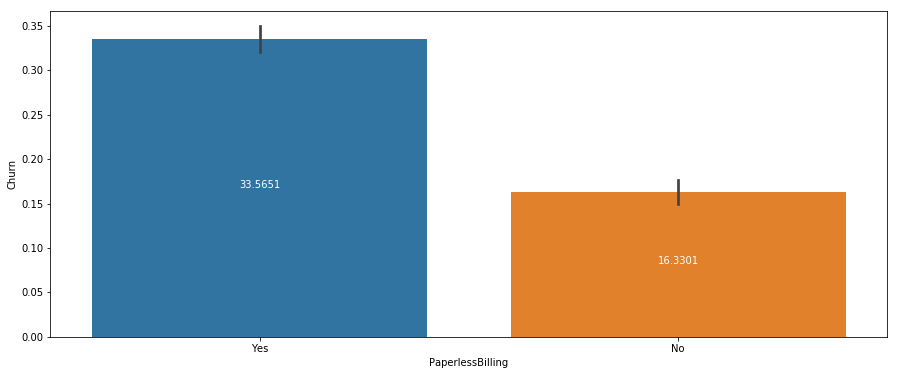

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='PaperlessBilling', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('paperless_billing_churn.png')

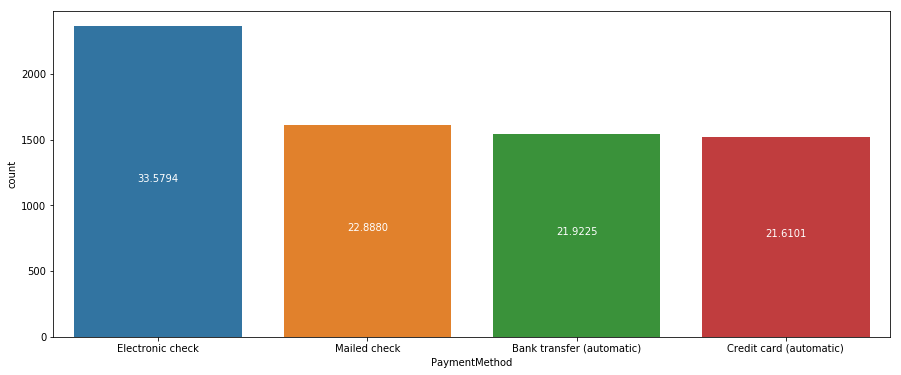

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='PaymentMethod', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('payment_method_dist.png')

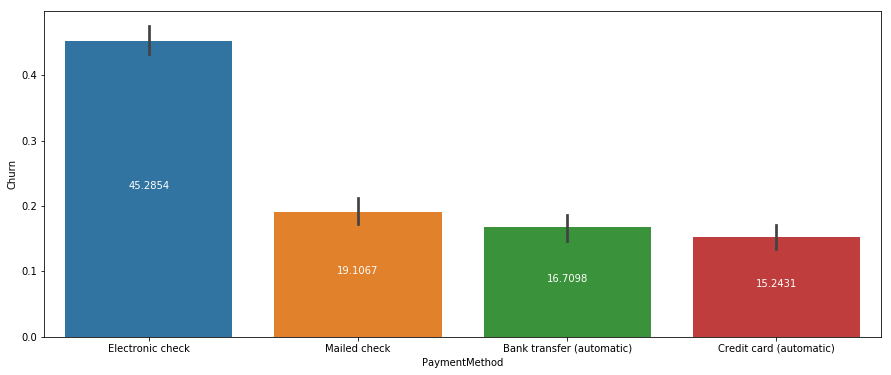

In [42]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='PaymentMethod', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('payment_method_churn.png')

# Clientes que utilizam o metodo de pagamento EletronicCheck possuem maior probabilidade de Churn

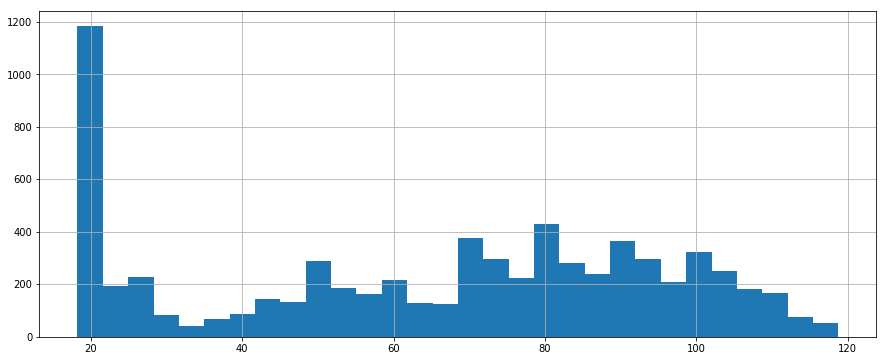

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))
# sns.distplot(df.MonthlyCharges, ax=ax)
df.MonthlyCharges.hist(bins=30, figsize=(15, 6), ax=ax)
# plt.show()
plt.savefig('monthly_charges_dist.png')

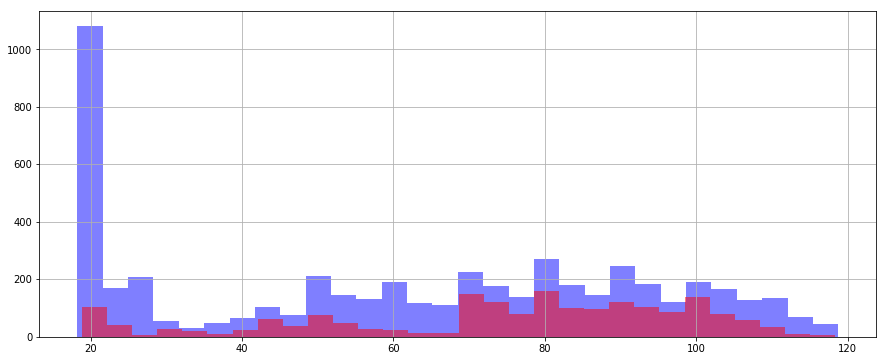

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))
df[df.Churn == 0]['MonthlyCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 1]['MonthlyCharges'].hist(bins=30, color="red", alpha=0.5, ax=ax)
# plt.show()
plt.savefig('monthly_charges_churn.png')

In [45]:
df.TotalCharges = df.TotalCharges.apply(lambda value: value if not value == ' ' else 0).astype('float64')

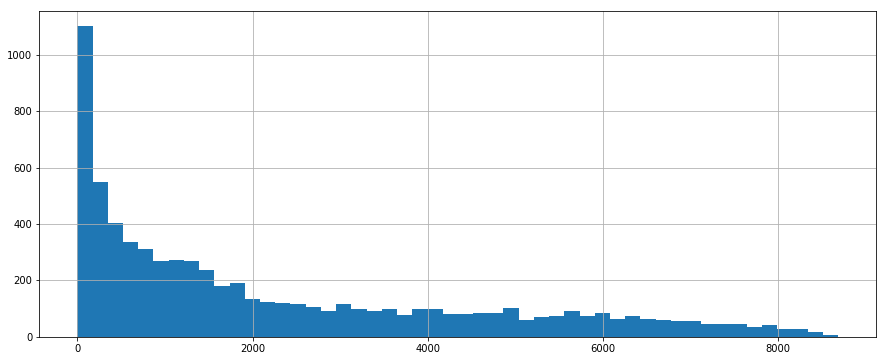

In [46]:
fig, ax = plt.subplots(figsize=(15, 6))
# sns.distplot(df.TotalCharges, ax=ax)
df.TotalCharges.hist(bins=50, figsize=(15, 6))
# plt.show()
plt.savefig('total_charges_dist.png')

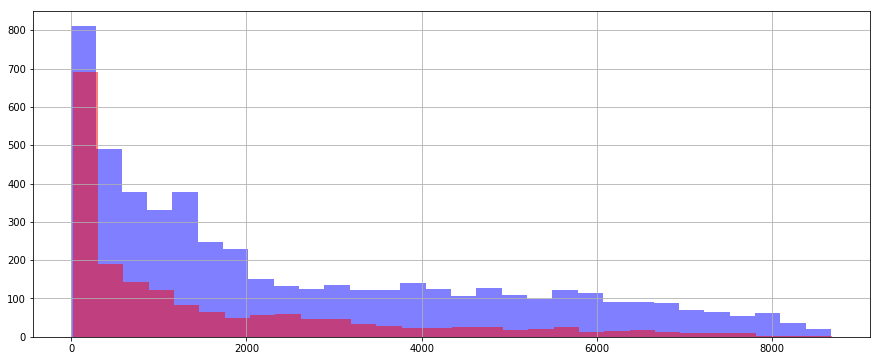

In [47]:
fig, ax = plt.subplots(figsize=(15, 6))
df[df.Churn == 0]['TotalCharges'].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 1]['TotalCharges'].hist(bins=30, color="red", alpha=0.5, ax=ax)
# plt.show()
plt.savefig('total_charges_churn.png')

# A maioria das features sao categoricas, eh necessario representar essas categorias numericamente

In [48]:
bins = [-1, 10, 20, 30, 40, 50, 60, np.inf]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', 'gt60']

df['tenure'] = pd.cut(df.tenure, bins, labels=labels)

# df['cat_tenure'] = pd.qcut(df.tenure, q=5, labels=['Qtl_'+x for x in ['20', '40', '60', '80', '100']])

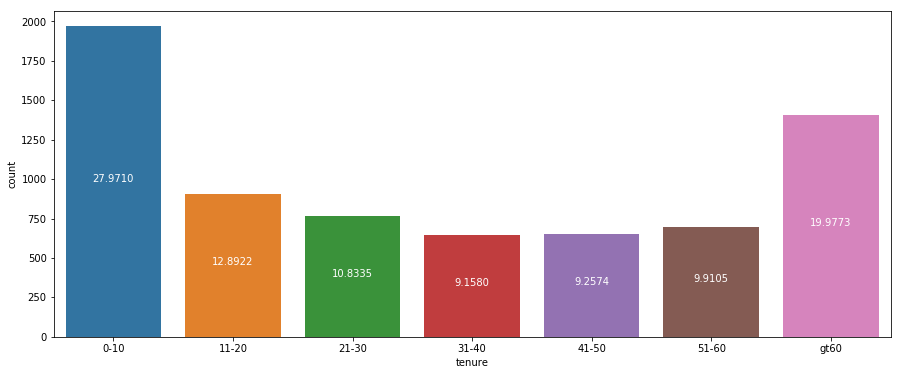

In [49]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='tenure', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('tenure_cat_dist.png')

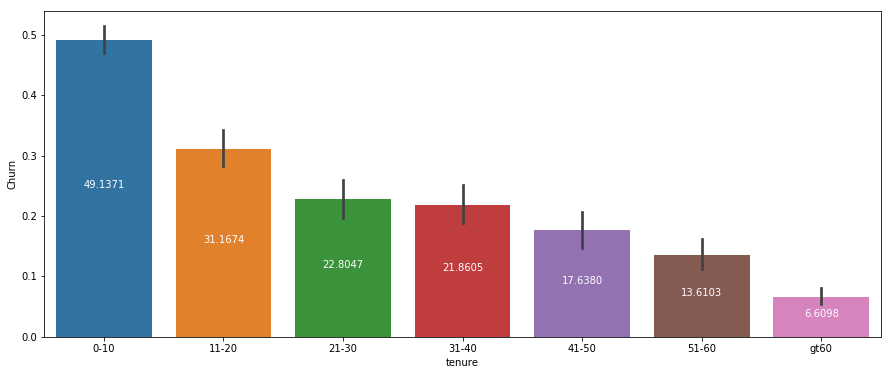

In [50]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='tenure', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('tenure_cat_churn.png')

In [51]:
df['TotalCharges'] = pd.qcut(df.TotalCharges, q=5, labels=['Qtl_'+x for x in ['20', '40', '60', '80', '100']])

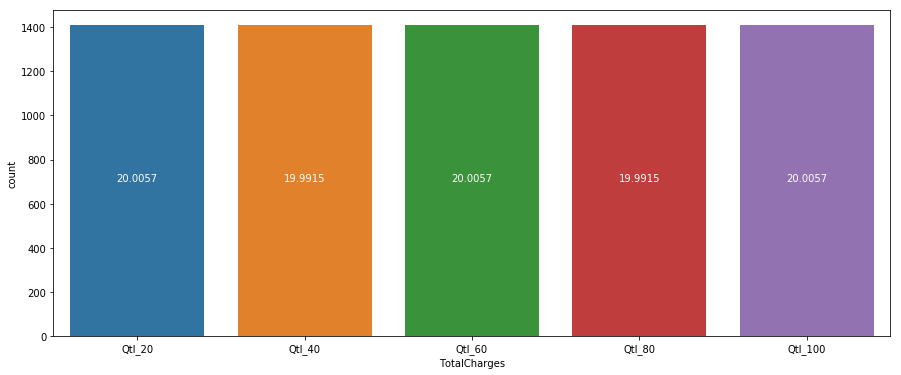

In [52]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='TotalCharges', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('total_charges_cat_dist.png')

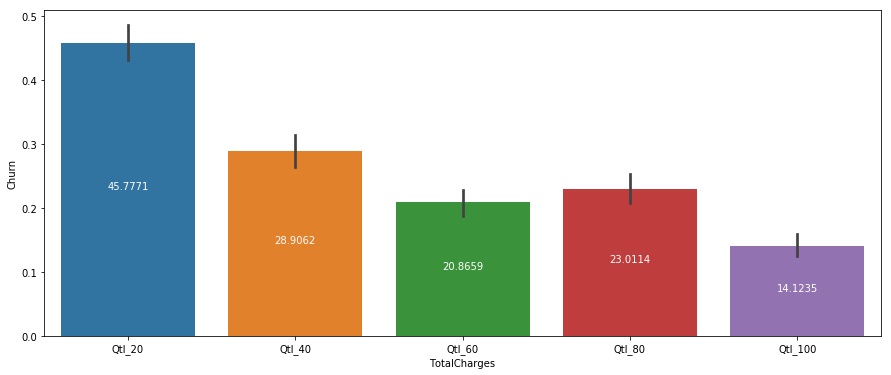

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='TotalCharges', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('total_charges_cat_churn.png')

In [54]:
bins = [10, 28, 46, 64, 82, 100, np.inf]
labels = ['10-28','28-46', '46-64', '64-82', '82-100', 'gt100']

df['MonthlyCharges'] = pd.cut(df.MonthlyCharges, bins, labels=labels)
# df['MonthlyCharges_cat'] = pd.qcut(df.MonthlyCharges, q=5, labels=['Qtl_'+x for x in ['20', '40', '60', '80', '100']])

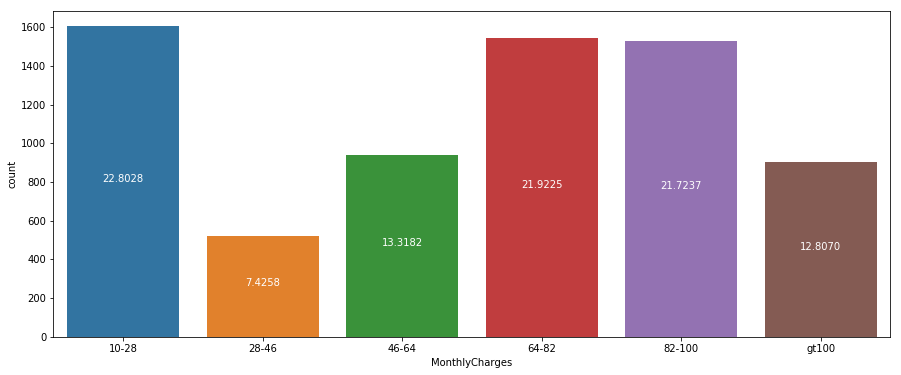

In [55]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.countplot(data=df, x='MonthlyCharges', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height/total),
            ha="center", color='white')
# plt.show()
plt.savefig('monthly_charges_cat.png')

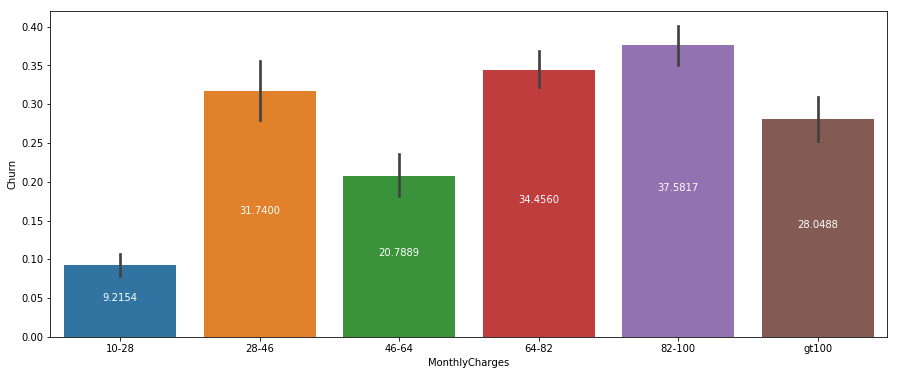

In [56]:
fig, ax = plt.subplots(figsize=(15, 6))
g = sns.barplot(y='Churn', data=df, x='MonthlyCharges', ax=ax)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{:1.4f}'.format(100*height),
            ha="center", color='white')
# plt.show()
plt.savefig('monthly_charges_cat_churn.png')

In [57]:
categoricals = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'PaperlessBilling', 'tenure', 'TotalCharges', 'MonthlyCharges']

dummies = ['Contract', 'PaymentMethod', 'InternetService']

In [58]:
num_df = pd.get_dummies(df[dummies])

for cat_column in categoricals:
    text_label = LabelEncoder()
    num_label = text_label.fit_transform(df[cat_column])
    num_df[cat_column + '_cat'] = num_label

In [59]:
df = pd.concat([df, num_df], axis=1)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,OnlineSecurity_cat,OnlineBackup_cat,DeviceProtection_cat,TechSupport_cat,StreamingTV_cat,StreamingMovies_cat,PaperlessBilling_cat,tenure_cat,TotalCharges_cat,MonthlyCharges_cat
0,7590-VHVEG,Female,0,Yes,No,0-10,No,No,DSL,No,...,0,1,0,0,0,0,1,0,1,1
1,5575-GNVDE,Male,0,No,No,31-40,Yes,No,DSL,Yes,...,1,0,1,0,0,0,0,3,3,2
2,3668-QPYBK,Male,0,No,No,0-10,Yes,No,DSL,Yes,...,1,1,0,0,0,0,1,0,1,2
3,7795-CFOCW,Male,0,No,No,41-50,No,No,DSL,Yes,...,1,0,1,1,0,0,0,4,3,1
4,9237-HQITU,Female,0,No,No,0-10,Yes,No,Fiber optic,No,...,0,0,0,0,0,0,1,0,1,3


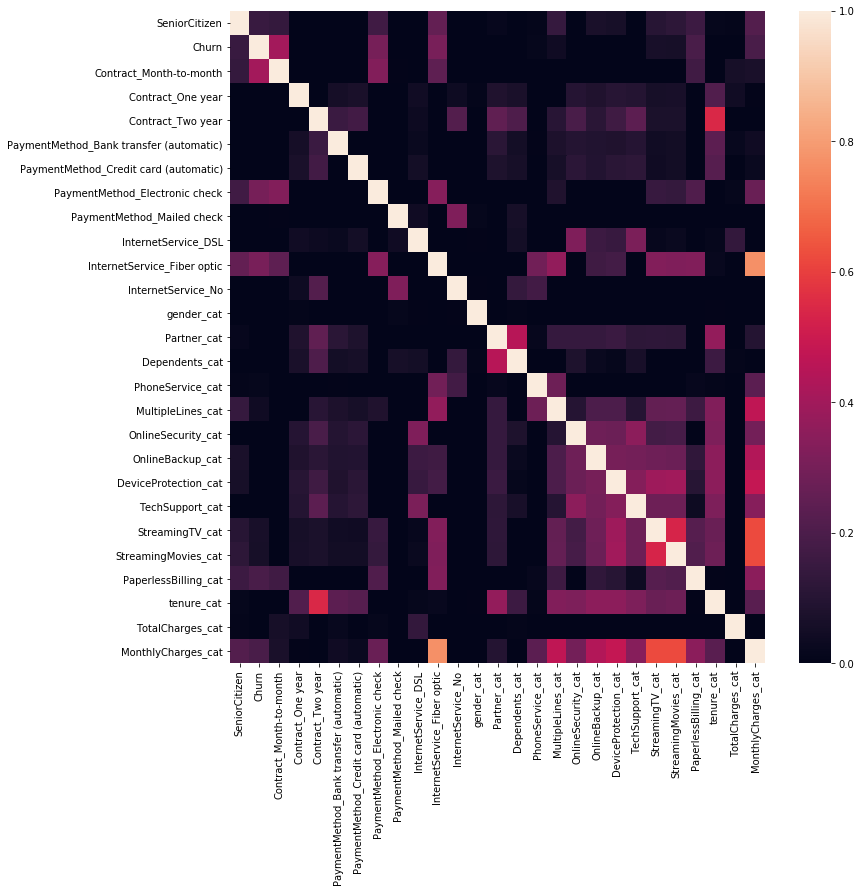

In [60]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), vmin=0, ax=ax)
plt.show()

In [61]:
data = df[[
    'SeniorCitizen', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 
    'gender_cat', 'Partner_cat', 'Dependents_cat', 'PhoneService_cat', 'MultipleLines_cat', 
    'OnlineSecurity_cat', 'OnlineBackup_cat', 'DeviceProtection_cat', 'TechSupport_cat',
    'StreamingTV_cat', 'StreamingMovies_cat', 'PaperlessBilling_cat',
    'tenure_cat', 'TotalCharges_cat', 'MonthlyCharges_cat'
          ]]
label = df['Churn']

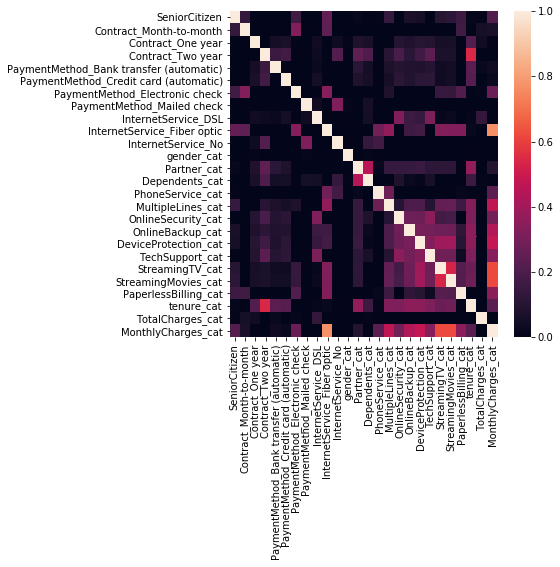

In [62]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), vmin=0, ax=ax)
# plt.show()
plt.savefig('data_corr_heatmap.png')

In [63]:
x_train, x_valid, y_train, y_valid = train_test_split(data, label, test_size=0.3)

In [64]:
modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

modelRF = RandomForestClassifier()
modelRF.fit(x_train, y_train)

modelGB = GradientBoostingClassifier()
modelGB.fit(x_train, y_train)

/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/educ71/miniconda3/envs/teste/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [65]:
predictLR = modelLR.predict(x_valid)
print('Logistic Regression: \n', classification_report(predictLR, y_valid))
print('Logistic Regression Accuracy: ', accuracy_score(predictLR, y_valid))

predictRF = modelRF.predict(x_valid)
print('Random Forest Classifier : \n', classification_report(predictRF, y_valid))
print('Random Forest Classifier Accuracy: ', accuracy_score(predictRF, y_valid))

predictGB = modelGB.predict(x_valid)
print('Gradient Boost Classifier : \n', classification_report(predictGB, y_valid))
print('Gradient Boost Classifier Accuracy: ', accuracy_score(predictGB, y_valid))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1653
           1       0.54      0.68      0.60       460

   micro avg       0.80      0.80      0.80      2113
   macro avg       0.72      0.76      0.74      2113
weighted avg       0.82      0.80      0.81      2113

Logistic Regression Accuracy:  0.804070042593469
Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85      1686
           1       0.45      0.60      0.51       427

   micro avg       0.77      0.77      0.77      2113
   macro avg       0.67      0.71      0.68      2113
weighted avg       0.80      0.77      0.78      2113

Random Forest Classifier Accuracy:  0.7685754850922859
Gradient Boost Classifier : 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1650
           1       0.54      0.68      0.60       4

In [66]:
print('Log-loss LR model: ', log_loss(y_pred=predictLR, y_true=y_valid))
print('Log-loss RF model: ', log_loss(y_pred=predictRF, y_true=y_valid))
print('Log-loss GB model: ', log_loss(y_pred=predictGB, y_true=y_valid))
print('Log-loss 0 model: ', log_loss(y_pred=[0 for i in range(len(y_valid))], y_true=y_valid))

NameError: name 'log_loss' is not defined

In [ ]:
features = data.columns
importances = modelRF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()